In [950]:
import matplotlib
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import numpy as np
from matplotlib.lines import Line2D
PLT_CELL = 5
FIG_DIR = "./"
# DATA_PATH = "../../data/simulated/Synthetic_1000/dyn-BFStrange/dyn-BFStrange-1000-10/"
# DATA_PATH = "../../data/simulated/Synthetic_2000/dyn-BFStrange/dyn-BFStrange-2000-10/"
# DATA_PATH = "../../data/simulated/Synthetic_1000/dyn-BF/dyn-BF-1000-10/"
# DATA_PATH = "../../data/simulated/Synthetic_2000/dyn-BF/dyn-BF-2000-10/"
DATA_PATH = "../../data/simulated/Synthetic_1000/dyn-TF/dyn-TF-1000-8/"
# DATA_PATH = "../../data/simulated/Synthetic_2000/dyn-TF/dyn-TF-2000-1/"

adata = ad.read_h5ad(DATA_PATH + "anndata_dpt_groups_mapped.h5ad")

adata.obs.dpt_groups.unique()

['2', '3', '1']
Categories (3, object): ['1', '2', '3']

In [951]:
# sc.tl.tsne(adata, perplexity = 500, random_state = 1)
# adata.obsm["X_tsne"] = adata.obsm["X_tsne"].to_numpy()

Text(0, 0.5, 'tsne2')

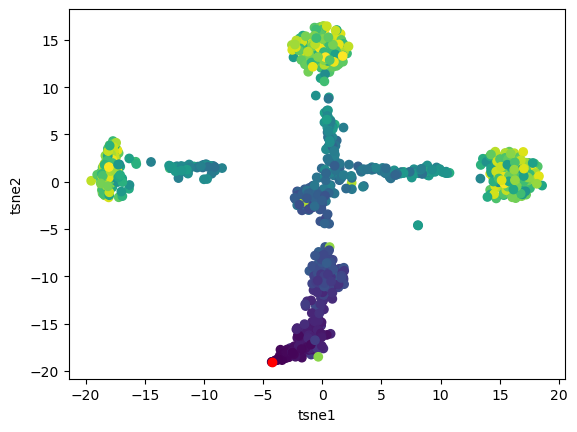

In [952]:
plt.scatter(adata.obsm["X_tsne"][:, 0], adata.obsm["X_tsne"][:, 1], c = adata.obs.dpt)
plt.scatter(adata.obsm["X_tsne"][adata.uns['iroot'], 0], adata.obsm["X_tsne"][adata.uns['iroot'], 1], c = "red")
plt.xlabel("tsne1")
plt.ylabel("tsne2")

Text(0.5, 0, 'tSNE2')

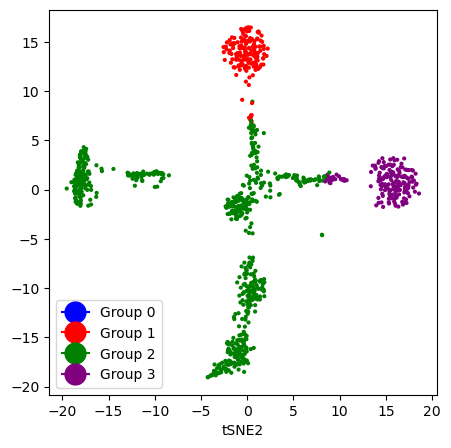

In [953]:
plt.figure(figsize = (PLT_CELL, PLT_CELL))
color_dict = {"0" : "blue", "1" : "red", "2" : "green", "3" : "purple"}
plt.scatter(adata.obsm["X_tsne"][:, 0], adata.obsm["X_tsne"][:, 1], c = [color_dict[x] for x in adata.obs.dpt_groups], s = 4)
legend_elements = [Line2D([0], [0], marker='o', color=v, label='Group %s' % k, markerfacecolor=v, markersize=15)
                    for (k, v) in color_dict.items()]
plt.gca().legend(handles=legend_elements, loc='lower left')
plt.xlabel("tSNE1")
plt.xlabel("tSNE2")

In [230]:
# remap dpt groups for Synthetic_1000/dyn_BFStrange
# 1
# dpt_group_map = {"0" : "1", 
#                  "1" : "1", 
#                  "2" : "0", 
#                  "3" : "2"}
# 2
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "0", 
#                  "3" : "0"}
# 3
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "1"}
# 4
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "0", 
#                  "3" : "2"}
# 5
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}
# 6
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "0", 
#                  "3" : "0"}
# 7
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "0", 
#                  "3" : "0"}
# 8
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}
# 9
# dpt_group_map = {"0" : "2", 
#                  "1" : "1", 
#                  "2" : "0", 
#                  "3" : "0"}
# 10
# dpt_group_map = {"0" : "0", 
#                  "1" : "0", 
#                  "2" : "1", 
#                  "3" : "0"}

In [925]:
adata.obs.dpt_groups = adata.obs.dpt_groups.apply(lambda x : dpt_group_map[x])

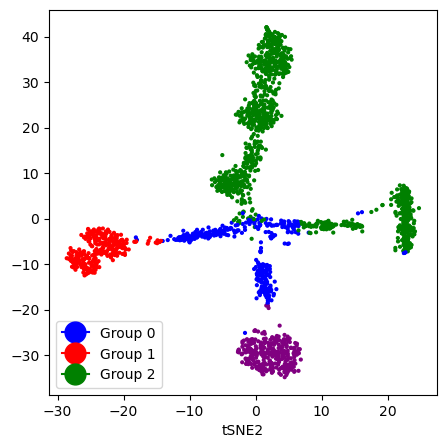

In [926]:
plt.figure(figsize = (PLT_CELL, PLT_CELL))
color_dict = {"0" : "blue", "1" : "red", "2" : "green", "3" : "purple"}
plt.scatter(adata.obsm["X_tsne"][:, 0], adata.obsm["X_tsne"][:, 1], c = [color_dict[x] for x in adata.obs.dpt_groups], s = 4)
legend_elements = [Line2D([0], [0], marker='o', color=v, label='Group %s' % k, markerfacecolor=v, markersize=15)
                    for (k, v) in color_dict.items()]
plt.gca().legend(handles=legend_elements[0:3], loc='lower left')
plt.xlabel("tSNE1")
plt.xlabel("tSNE2")
plt.savefig(FIG_DIR + "bifurc_sim_tsne.pdf")

In [927]:
adata.obs.dpt_groups.unique()

['1', '2', '3', '0']
Categories (4, object): ['0', '1', '2', '3']

In [928]:
DATA_PATH

'../../data/simulated/Synthetic_2000/dyn-TF/dyn-TF-2000-1/'

In [929]:
np.save(DATA_PATH + "X_tsne2.npy", adata.obsm["X_tsne"])
np.save(DATA_PATH + "dpt_pseudotime.npy", adata.obs.dpt_pseudotime)
np.save(DATA_PATH + "clusterid.npy", np.array([int(x) for x in adata.obs.dpt_groups]))
adata.write(DATA_PATH + "anndata_dpt_groups_mapped.h5ad")

In [99]:
# fate probabilities
# adata.obsm["P_velo_dot"]
# sink_idx = (adata.obs.dpt >= np.quantile(adata.obs.dpt, 0.925)) & (adata.obs.dpt < np.quantile(adata.obs.dpt, 0.975))
# adata.obsm["P_velo_dot"].todense()
# import statot
# B = statot.inference.compute_fate_probs_lineages(adata.obsm["P_velo_dot"].todense(), sink_idx, adata.obs.dpt_groups)[0]
# plt.scatter(adata.obsm["X_tsne"][:, 0], adata.obsm["X_tsne"][:, 1], c = B[:, 1])

In [357]:
# remap dpt groups for Synthetic_1000/dyn_BF
# 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "3"}

In [477]:
# remap dpt groups for Synthetic_2000/dyn_BFStrange
# 1
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "0", 
#                  "3" : "0"}
# 2 
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}
# 3
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}
# 4
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "0", 
#                  "3" : "2"}
# 5
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}
# 6
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "0", 
#                  "3" : "2"}
# 7
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}
# 8
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}
# 9
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}
# 10
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}

In [656]:
# remap dpt groups for Synthetic_2000/dyn_BF
# 1, 2, 4, 6, 8, 9, 10
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "3"}
# 3
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "0", 
#                  "3" : "2"}
# 5
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}
# 7
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}

In [ ]:
# remap dpt groups for Synthetic_1000/dyn_TF
# 1
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}
# 2
# dpt_group_map = {"0" : "0", 
#                  "1" : "0", 
#                  "2" : "1", 
#                  "3" : "0"}
# 3
# dpt_group_map = {"0" : "1", 
#                  "1" : "1", 
#                  "2" : "0", 
#                  "3" : "1"}
# 4
# dpt_group_map = {"0" : "1", 
#                  "1" : "1", 
#                  "2" : "1", 
#                  "3" : "0"}
# 5
# dpt_group_map = {"0" : "2", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "3"}
# 6, 7
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "3"}
# 8, 9
# dpt_group_map = {"0" : "2", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "3"}
# 10
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}

In [924]:
# remap dpt groups for Synthetic_2000/dyn_TF
# 1
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "3"}
# 2
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}
# 3
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}
# 4
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "3"}
# 5
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "0", 
#                  "3" : "2"}
# 6, 7, 8, 9
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "3"}
# 10
# dpt_group_map = {"0" : "0", 
#                  "1" : "1", 
#                  "2" : "2", 
#                  "3" : "0"}